In [ ]:
pip install pysimplegui


In [ ]:
pip install --upgrade pip

In [1]:
import cv2
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from tensorflow.keras.models import load_model
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
import math
import statistics
from PIL import Image
from sklearn.metrics.cluster import entropy
from itertools import combinations
import csv
import glob
import pylab as plt
import PySimpleGUI as sg
from statistics import stdev

You clicked Submit
You chose filenames /home/sabahat/Documents/FYP/Validation/V0250.jpg


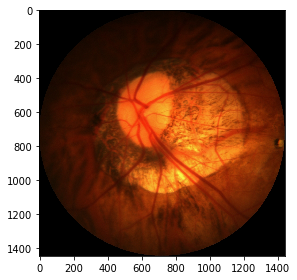

1/1 [==============================] - 0s 346ms/sample


In [5]:


sg.theme('Light Blue 2')

layout = [[sg.Text('Enter Fundus Image file ')],
          [sg.Text('File ', size=(8, 1)), sg.Input(), sg.FileBrowse()],
          [sg.Submit(), sg.Cancel()]]

window = sg.Window('Image ', layout)

event, values = window.read()
window.close()
print(f'You clicked {event}')
print(f'You chose filenames {values[0]}')

text_input = values[0]
realimg = imread(text_input)
#sg.popup('Image: ', realimg)

img_width = 128 
img_hight = 128 
img_channels = 3 
def imgget():
    return realimg
#realimg=cv2.imread('Validation/'+'V0101'+'.jpg')
Pcount=0
Hcount=0
Ncount=0
PL=0
PPA=0
FS=0
TF=0
imshow(realimg)
plt.show()

    
#print("Tigroid Fundus Feature Extraction and Classification")    
realimg=imgget()
image = cv2.resize(realimg, (600, 600))
#cv2.imshow("real",image)
# px=image.load()
img = image.copy()
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
green = image[:, :, 1]

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(green)
ret, thresh = cv2.threshold(clahe_img, 50, 255, cv2.THRESH_TOZERO_INV)
res = cv2.bitwise_and(img, thresh)
#cv2.imshow('res', res)
#cv2.imshow('thrsh',thresh)
# cv2.imshow('img',image)
#abc = cv2.subtract(img, res)
#abc = abc[:, :, 2]
#cv2.imshow('sub', abc)

imgg = img_as_ubyte(res)

bins = np.array([16,32])  # 16-bit
inds = np.digitize(imgg, bins)

max_value = inds.max() + 1
matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi / 2, np.pi / 4, (3 * np.pi / 4)], levels=max_value,
                                    normed=True, symmetric=False)

#print(matrix_coocurrence)
#print('############################')
# GLCM properties
def contrast_feature(matrix_coocurrence):
    contrast = greycoprops(matrix_coocurrence, 'contrast')
    return contrast


def dissimilarity_feature(matrix_coocurrence):
    dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')
    return dissimilarity


def homogeneity_feature(matrix_coocurrence):
    homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
    return homogeneity


def energy_feature(matrix_coocurrence):
    energy = greycoprops(matrix_coocurrence, 'energy')
    return energy


def correlation_feature(matrix_coocurrence):
    correlation = greycoprops(matrix_coocurrence, 'correlation')
    return correlation


def asm_feature(matrix_coocurrence):
    asm = greycoprops(matrix_coocurrence, 'ASM')
    return asm


entropy = -np.sum(matrix_coocurrence * np.log2(matrix_coocurrence + (matrix_coocurrence == 0)))

cf = (contrast_feature(matrix_coocurrence))
df = (dissimilarity_feature(matrix_coocurrence))
hf = (homogeneity_feature(matrix_coocurrence))
ef = (energy_feature(matrix_coocurrence))
cof = (correlation_feature(matrix_coocurrence))
af = (asm_feature(matrix_coocurrence))
#ent=entropy(matrix_coocurrence)
contrast = statistics.mean(sum(cf))
disimilarity = statistics.mean(sum(df))
homogenity = statistics.mean(sum(hf))
energy = statistics.mean(sum(ef))
corelation = statistics.mean(sum(cof))
asm = statistics.mean(sum(af))

#print('##############33333')
#print('corelation', corelation)
#print('homogenity', homogenity)
#print('energy', energy)
#print('disimilarity', disimilarity)
#print('contrast', contrast)
#print('asm', asm)
#print('entropy',entropy)
test=[]
test.append(corelation)
test.append(disimilarity)
test.append(energy)
test.append(homogenity)
test.append(contrast)
test.append(asm)
test.append(entropy)
test=[test]
from sklearn.externals import joblib 
# Load the model from the file 
Tigroid_from_joblib = joblib.load('Tigroid.pkl')  
# Use the loaded model to make predictions 
y_pred1 =Tigroid_from_joblib.predict(test)
if y_pred1=='Normal':
    Ncount=Ncount+1
elif y_pred1=='HighlyMyopic':
    Hcount=Hcount+1
elif y_pred1=='Pathologically Myopic':
    TF=TF+1
    Pcount=Pcount+1
#print(y_pred1)
#print(test)
cv2.waitKey(0)
cv2.destroyAllWindows()



##print("PosteriorStaphyloma and Lattice Degeneration Feature Extraction and Classification")
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
new_model = tf.keras.models.load_model('Posterior_saved_model/my_model')
def predict(file_name):
    X_test = np.zeros((1,img_hight, img_width, img_channels), dtype=np.uint8)
    image = file_name
    image1 = resize(image, (img_hight, img_width), mode='constant', preserve_range=True)
    X_test = np.reshape(image1, X_test.shape)

    # Predicting
    predicted_valid = new_model.predict(X_test, verbose=1)
    preds_valid_t = (predicted_valid > 0.5).astype(np.uint8) # ceil the values(if > 0.5 then convert to 1)
    pred_img =  np.squeeze(preds_valid_t) # convert (1,128,128,1) to (128,128)
    #imshow(pred_img)
    #plt.show()
    return pred_img
realimg=imgget()
mask = predict(realimg) # predicting mask from model
mask=cv2.resize(mask,(128,128))
rimg=realimg
rimg=cv2.resize(rimg,(128,128))
for i in range(128):
    for j in range(128):
        if mask[i,j]==0:
            rimg[i,j]=rimg[i,j]
        elif mask[i,j]==1:
            rimg[i,j]=255
#imshow(rimg)
#plt.show()
rimg=cv2.cvtColor(rimg,cv2.COLOR_BGR2GRAY)
glcm = np.squeeze(greycomatrix(rimg, distances=[1], 
                            angles=[0,45,90,135,180,225,270,315,360], symmetric=True, normed=True))
entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
# yields 10.704625483788325
#print(entropy)
entropy=truncate(entropy,5)


bright_count = np.sum(np.array(rimg) < 255)
#print(bright_count)
PLFeature=[]
PLFeature.append(entropy)
PLFeature.append(bright_count)
PLFeature=[PLFeature]
from sklearn.externals import joblib 
# Load the model from the file 
Posterior_from_joblib = joblib.load('Posterior.pkl')  
# Use the loaded model to make predictions 
y_pred =Posterior_from_joblib.predict(PLFeature)
#print(y_pred)
#print(PLFeature)
if y_pred=='Normal':
    Ncount=Ncount+1
elif y_pred=='HighlyMyopic':
    Hcount=Hcount+1
elif y_pred=='PathologicallyMyopic':
    PL=PL+1
    Pcount=Pcount+1


#print("Fuch's Spots Feature Extraction and Classification")
#!/usr/bin/python

# Standard imports

desc1=[]
distance=[]
length=[]
avgarea=[]
count=1
name=[]
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
realimg=imgget()
im=realimg
im = cv2.resize(im, (400, 400))
im = im[:, :, 2]

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 150

# filter by color
params.filterByColor = True
params.blobColor = 0

# Filter by Area.
params.filterByArea = True
params.minArea = 50
params.maxArea = 100

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.01
params.maxCircularity = 0.99

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.01
params.maxConvexity = 0.99

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.1
params.maxInertiaRatio = 0.99

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3:
    detector = cv2.SimpleBlobDetector(params)
else:
    detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im, None)

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3:
    detector1 = cv2.ORB()
else:
    detector1 = cv2.ORB_create()
keypoints, desc = detector1.compute(im, keypoints, None)
# desc1=detector.compute(im,keypoints,None)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255),
                                        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
x=[]
y=[]
cord = []
sizes = []
for keyPoint in keypoints:
    x.append(keyPoint.pt[0])
    y.append(keyPoint.pt[1])
    s = keyPoint.size
    cord.append([x, y, s])
    sizes.append(s)

# Show blobs
# print("# of blobs  ", len(keypoints))

# print(desc)
# print(len(desc))
###########CALCULATING AVERANGE DISTANCE BETWEEN POINTS##################3
if len(keypoints)>1:
    points = list(zip(x, y))
    distances = [dist(p1, p2) for p1, p2 in combinations(points, 2)]
    avg_distance = sum(distances) / len(distances)
    distance.append(avg_distance)
    #print("average distance",avg_distance)
else:
    distance.append(0)
################################################################################

###########################average of points and average size##############
arr = []
if len(keypoints) == 0:
    desc1.append(0)
else:
    for i in desc:
        for j in i:
            # print(j)
            arr.append(j)

    #stdarr = sum(arr)
    stdavg= statistics.mean(arr)
    #print(stdavg)
    desc1.append(stdavg)
# print(arr)
if len(sizes) != 0:
    meansize = sum(sizes)
    #print('area ',meansize)
    avgarea.append(meansize)
else:
    avgarea.append(0)
#print(desc1)
#print(avgarea)
length.append(len(keypoints))
#cv2.imshow("Keypoints", im_with_keypoints)
#print('# of blobs ',len(keypoints))
feature=[]
feature.append(desc1[0])
feature.append(distance[0])
feature.append(length[0])
feature.append(avgarea[0])
#print(feature)
feature=[feature]
from sklearn.externals import joblib 
# Load the model from the file 
fuchs_from_joblib = joblib.load('fuchs.pkl')  
# Use the loaded model to make predictions 
y_pred2 =fuchs_from_joblib.predict(feature)
#print(y_pred2)
if y_pred2=='Normal':
    Ncount=Ncount+1
elif y_pred2=='HighlyMyopic':
    Hcount=Hcount+1
elif y_pred2=='PathologicallyMyopic':
    FS=FS+1
    Pcount=Pcount+1
#print(test)
cv2.waitKey(0)
cv2.destroyAllWindows()


#print("Peripapillary Atrophy Feature Extraction and Classification")
import os

import tensorflow as tf
from tensorflow import keras
''' Standard Size of Images '''
img_width = 128 
img_hight = 128
img_channels = 3
OD_Model = tf.keras.models.load_model('saved_model/my_model')
def truncate1(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
def predict(file_name):
    X_test = np.zeros((1,img_hight, img_width, img_channels), dtype=np.uint8)
    image = file_name
    image1 = resize(image, (img_hight, img_width), mode='constant', preserve_range=True)
    X_test = np.reshape(image1, X_test.shape)

    # Predicting
    predicted_valid = OD_Model.predict(X_test, verbose=1)
    preds_valid_t = (predicted_valid > 0.5).astype(np.uint8) # ceil the values(if > 0.5 then convert to 1)
    pred_img =  np.squeeze(preds_valid_t) # convert (1,128,128,1) to (128,128)
    return pred_img
realimg = imgget()
predimg=predict(realimg)
#print('Predicted Optic Disk:')
#imshow(predimg)
#plt.show()
image=predimg
#plt.show()
for x in range (128):
    for y in range (128):
        if image[y,x]==0 :
            # print('yes')
            image[y,x]=0
            predimg[y,x]=0
        elif image[y,x]==1 :
            # print("no")
            image[y,x]=255
            predimg[y,x]=255
image=cv2.resize(image,(400,400))
ret,thresh = cv2.threshold(image,120,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
cnt = contours[0]
M = cv2.moments(cnt)
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
radius += 20
for i in range(1,radius):
    image = cv2.circle(image,center,radius-i,(0,255,0),85)
    # print(radius)
gray = cv2.cvtColor(realimg, cv2.COLOR_BGR2GRAY)
gray=cv2.resize(gray,(400,400))
img2 = cv2.bitwise_or(gray,image)
predimg=cv2.resize(predimg,(400,400))
zimg=cv2.bitwise_or(img2,predimg)
img2=cv2.bitwise_xor(img2,zimg)
#pimg=cv2.bitwise_xor(gray,predimg)
#print('img2:')
# print(radius)
#imshow(img2)
#plt.show()
realimg=cv2.resize(realimg,(128,128))
rmg=imgget()
rmg=cv2.resize(rmg,(128,128))
img2=cv2.resize(img2,(128,128))
for i in range(128):
    for j in range(128):
        if img2[i,j]==0:
            rmg[i,j]=255
        else:
            rmg[i,j]=rmg[i,j]
#print('Actual Fundus Image:')
#imshow(rmg)
#plt.show()
PPA_Model = tf.keras.models.load_model('PPAModel/my_model')
def predict2(file_name):
    X_test = np.zeros((1,img_hight, img_width, img_channels), dtype=np.uint8)
    image = file_name
    image1 = resize(image, (img_hight, img_width), mode='constant', preserve_range=True)
    X_test = np.reshape(image1, X_test.shape)

    # Predicting
    predicted_valid = PPA_Model.predict(X_test, verbose=1)
    preds_valid_t = (predicted_valid > 0.5).astype(np.uint8) # ceil the values(if > 0.5 then convert to 1)
    pred_img =  np.squeeze(preds_valid_t) # convert (1,128,128,1) to (128,128)
    return pred_img
ppa=predict2(rmg)
pmg=imgget()
pmg=cv2.resize(pmg,(128,128))
for i in range(128):
    for j in range(128):
        if ppa[i,j]==1:
            pmg[i,j]=255
        else:
            pmg[i,j]=pmg[i,j]
#imshow(pmg)
#plt.show()
pmg = cv2.cvtColor(pmg, cv2.COLOR_BGR2GRAY)
glcm = np.squeeze(greycomatrix(pmg, distances=[1], 
                            angles=[0,45,90,135,180], symmetric=True, normed=True))
entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
# yields 10.704625483788325
#print(entropy)
entropy=truncate1(entropy,5)
#entr.append(entropy)
entropy=[entropy]
entropy=[entropy]
from sklearn.externals import joblib 
# Load the model from the file 
PPA_from_joblib = joblib.load('PPA.pkl')  
# Use the loaded model to make predictions 
y_pred3 =PPA_from_joblib.predict(entropy)
#print(y_pred)
if y_pred3=='Normal':
    Ncount=Ncount+1
elif y_pred3=='HighlyMyopic':
    Hcount=Hcount+1
elif y_pred3=='PathologicallyMyopic':
    PPA=PPA+1
    Pcount=Pcount+1
    
    
#print(Ncount)
#print(Pcount)
#print(Hcount)
    
if Ncount>Pcount and Ncount>Hcount and Pcount==0:
    sg.popup("Image is Normal Fundus image ")
elif Hcount>Pcount and Hcount>Ncount and Pcount==0:
    sg.popup("Image is Highly Myopic Fundus Image ")
elif Pcount>Ncount and Pcount>Hcount or Pcount>0:
    if PL>0:
        statement="Posterior Staphyloma, Lattice Degeneration "
    if TF>0:
        statement=statement+" ,Tigroid Fundus "
    if FS>0:
        statement=statement+" ,Fuch's Spots "
    if PPA>0:
        statement=statement+" ,Peripapillary Atrophy"
    sg.popup("Image is Pathologically Myopic and contain disease feature like: ", statement)








# # Tigroid Fundus Feature extraction and classification

In [ ]:
realimg=imgget()
imshow(realimg)
plt.show()
image = cv2.resize(realimg, (600, 600))
#cv2.imshow("real",image)
# px=image.load()
img = image.copy()
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
green = image[:, :, 1]

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(green)
ret, thresh = cv2.threshold(clahe_img, 50, 255, cv2.THRESH_TOZERO_INV)
res = cv2.bitwise_and(img, thresh)
#cv2.imshow('res', res)
#cv2.imshow('thrsh',thresh)
# cv2.imshow('img',image)
#abc = cv2.subtract(img, res)
#abc = abc[:, :, 2]
#cv2.imshow('sub', abc)

imgg = img_as_ubyte(res)

bins = np.array([16,32])  # 16-bit
inds = np.digitize(imgg, bins)

max_value = inds.max() + 1
matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi / 2, np.pi / 4, (3 * np.pi / 4)], levels=max_value,
                                    normed=True, symmetric=False)

#print(matrix_coocurrence)
#print('############################')
# GLCM properties
def contrast_feature(matrix_coocurrence):
    contrast = greycoprops(matrix_coocurrence, 'contrast')
    return contrast


def dissimilarity_feature(matrix_coocurrence):
    dissimilarity = greycoprops(matrix_coocurrence, 'dissimilarity')
    return dissimilarity


def homogeneity_feature(matrix_coocurrence):
    homogeneity = greycoprops(matrix_coocurrence, 'homogeneity')
    return homogeneity


def energy_feature(matrix_coocurrence):
    energy = greycoprops(matrix_coocurrence, 'energy')
    return energy


def correlation_feature(matrix_coocurrence):
    correlation = greycoprops(matrix_coocurrence, 'correlation')
    return correlation


def asm_feature(matrix_coocurrence):
    asm = greycoprops(matrix_coocurrence, 'ASM')
    return asm


entropy = -np.sum(matrix_coocurrence * np.log2(matrix_coocurrence + (matrix_coocurrence == 0)))

cf = (contrast_feature(matrix_coocurrence))
df = (dissimilarity_feature(matrix_coocurrence))
hf = (homogeneity_feature(matrix_coocurrence))
ef = (energy_feature(matrix_coocurrence))
cof = (correlation_feature(matrix_coocurrence))
af = (asm_feature(matrix_coocurrence))
#ent=entropy(matrix_coocurrence)
contrast = statistics.mean(sum(cf))
disimilarity = statistics.mean(sum(df))
homogenity = statistics.mean(sum(hf))
energy = statistics.mean(sum(ef))
corelation = statistics.mean(sum(cof))
asm = statistics.mean(sum(af))

#print('##############33333')
#print('corelation', corelation)
#print('homogenity', homogenity)
#print('energy', energy)
#print('disimilarity', disimilarity)
#print('contrast', contrast)
#print('asm', asm)
#print('entropy',entropy)
test=[]
test.append(corelation)
test.append(disimilarity)
test.append(energy)
test.append(homogenity)
test.append(contrast)
test.append(asm)
test.append(entropy)
test=[test]
from sklearn.externals import joblib 
# Load the model from the file 
Tigroid_from_joblib = joblib.load('Tigroid.pkl')  
# Use the loaded model to make predictions 
y_pred1 =Tigroid_from_joblib.predict(test)
if y_pred1=='Normal':
    print("n")
    Ncount=Ncount+1
elif y_pred1=='HighlyMyopic':
    print('h')
    Hcount=Hcount+1
elif y_pred1=='Pathologically Myopic':
    print('1')
    Pcount=Pcount+1
print(y_pred1)
#print(test)
cv2.waitKey(0)
cv2.destroyAllWindows()

# # # Posterior and Lattice Degeneration  Feature EXtraction and Classification

In [ ]:
def truncate(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
new_model = tf.keras.models.load_model('Posterior_saved_model/my_model')
def predict(file_name):
    X_test = np.zeros((1,img_hight, img_width, img_channels), dtype=np.uint8)
    image = file_name
    image1 = resize(image, (img_hight, img_width), mode='constant', preserve_range=True)
    X_test = np.reshape(image1, X_test.shape)

    # Predicting
    predicted_valid = new_model.predict(X_test, verbose=1)
    preds_valid_t = (predicted_valid > 0.5).astype(np.uint8) # ceil the values(if > 0.5 then convert to 1)
    pred_img =  np.squeeze(preds_valid_t) # convert (1,128,128,1) to (128,128)
    imshow(pred_img)
    plt.show()
    return pred_img
realimg=imgget()
mask = predict(realimg) # predicting mask from model
mask=cv2.resize(mask,(128,128))
rimg=realimg
rimg=cv2.resize(rimg,(128,128))
for i in range(128):
    for j in range(128):
        if mask[i,j]==0:
            rimg[i,j]=rimg[i,j]
        elif mask[i,j]==1:
            rimg[i,j]=255
#imshow(rimg)
#plt.show()
rimg=cv2.cvtColor(rimg,cv2.COLOR_BGR2GRAY)
glcm = np.squeeze(greycomatrix(rimg, distances=[1], 
                            angles=[0,45,90,135,180,225,270,315,360], symmetric=True, normed=True))
entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
# yields 10.704625483788325
#print(entropy)
entropy=truncate(entropy,5)


bright_count = np.sum(np.array(rimg) < 255)
#print(bright_count)
PLFeature=[]
PLFeature.append(entropy)
PLFeature.append(bright_count)
PLFeature=[PLFeature]
from sklearn.externals import joblib 
# Load the model from the file 
Posterior_from_joblib = joblib.load('Posterior.pkl')  
# Use the loaded model to make predictions 
y_pred =Posterior_from_joblib.predict(PLFeature)
print(y_pred)
#print(PLFeature)
if y_pred=='Normal':
    Ncount=Ncount+1
elif y_pred=='HighlyMyopic':
    Hcount=Hcount+1
elif y_pred=='PathologicallyMyopic':
    Pcount=Pcount+1

# Fuch's Spots Feature Extraction and Classification

In [ ]:
#Fuch's Spots Feature Extraction and Classification
#!/usr/bin/python

# Standard imports

desc1=[]
distance=[]
length=[]
avgarea=[]
count=1
name=[]
def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
realimg=imgget()
im=realimg
im = cv2.resize(im, (400, 400))
im = im[:, :, 2]

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 150

# filter by color
params.filterByColor = True
params.blobColor = 0

# Filter by Area.
params.filterByArea = True
params.minArea = 50
params.maxArea = 100

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.01
params.maxCircularity = 0.99

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.01
params.maxConvexity = 0.99

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.1
params.maxInertiaRatio = 0.99

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3:
    detector = cv2.SimpleBlobDetector(params)
else:
    detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs.
keypoints = detector.detect(im, None)

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3:
    detector1 = cv2.ORB()
else:
    detector1 = cv2.ORB_create()
keypoints, desc = detector1.compute(im, keypoints, None)
# desc1=detector.compute(im,keypoints,None)
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0, 0, 255),
                                        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
x=[]
y=[]
cord = []
sizes = []
for keyPoint in keypoints:
    x.append(keyPoint.pt[0])
    y.append(keyPoint.pt[1])
    s = keyPoint.size
    cord.append([x, y, s])
    sizes.append(s)

# Show blobs
# print("# of blobs  ", len(keypoints))

# print(desc)
# print(len(desc))
###########CALCULATING AVERANGE DISTANCE BETWEEN POINTS##################3
if len(keypoints)>1:
    points = list(zip(x, y))
    distances = [dist(p1, p2) for p1, p2 in combinations(points, 2)]
    avg_distance = sum(distances) / len(distances)
    distance.append(avg_distance)
    #print("average distance",avg_distance)
else:
    distance.append(0)
################################################################################

###########################average of points and average size##############
arr = []
if len(keypoints) == 0:
    desc1.append(0)
else:
    for i in desc:
        for j in i:
            # print(j)
            arr.append(j)

    #stdarr = sum(arr)
    stdavg= statistics.mean(arr)
    #print(stdavg)
    desc1.append(stdavg)
# print(arr)
if len(sizes) != 0:
    meansize = sum(sizes)
    #print('area ',meansize)
    avgarea.append(meansize)
else:
    avgarea.append(0)
#print(desc1)
#print(avgarea)
length.append(len(keypoints))
#cv2.imshow("Keypoints", im_with_keypoints)
#print('# of blobs ',len(keypoints))
feature=[]
feature.append(desc1[0])
feature.append(distance[0])
feature.append(length[0])
feature.append(avgarea[0])
#print(feature)
feature=[feature]
from sklearn.externals import joblib 
# Load the model from the file 
fuchs_from_joblib = joblib.load('fuchs.pkl')  
# Use the loaded model to make predictions 
y_pred2 =fuchs_from_joblib.predict(feature)
print(y_pred2)
if y_pred2=='Normal':
    Ncount=Ncount+1
elif y_pred2=='HighlyMyopic':
    Hcount=Hcount+1
elif y_pred2=='PathologicallyMyopic':
    Pcount=Pcount+1
#print(test)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Peripapillary Atrophy Feature Extraction and Classification 

In [ ]:
#Peripapillary Atrophy Feature Extraction and Classification
import os

import tensorflow as tf
from tensorflow import keras
''' Standard Size of Images '''
img_width = 128 
img_hight = 128
img_channels = 3
OD_Model = tf.keras.models.load_model('saved_model/my_model')
def truncate1(number, digits) -> float:
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper
def predict(file_name):
    X_test = np.zeros((1,img_hight, img_width, img_channels), dtype=np.uint8)
    image = file_name
    image1 = resize(image, (img_hight, img_width), mode='constant', preserve_range=True)
    X_test = np.reshape(image1, X_test.shape)

    # Predicting
    predicted_valid = OD_Model.predict(X_test, verbose=1)
    preds_valid_t = (predicted_valid > 0.5).astype(np.uint8) # ceil the values(if > 0.5 then convert to 1)
    pred_img =  np.squeeze(preds_valid_t) # convert (1,128,128,1) to (128,128)
    return pred_img
realimg = imgget()
predimg=predict(realimg)
#print('Predicted Optic Disk:')
#imshow(predimg)
#plt.show()
image=predimg
#plt.show()
for x in range (128):
    for y in range (128):
        if image[y,x]==0 :
            # print('yes')
            image[y,x]=0
            predimg[y,x]=0
        elif image[y,x]==1 :
            # print("no")
            image[y,x]=255
            predimg[y,x]=255
image=cv2.resize(image,(400,400))
ret,thresh = cv2.threshold(image,120,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
cnt = contours[0]
M = cv2.moments(cnt)
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
radius += 20
for i in range(1,radius):
    image = cv2.circle(image,center,radius-i,(0,255,0),85)
    # print(radius)
gray = cv2.cvtColor(realimg, cv2.COLOR_BGR2GRAY)
gray=cv2.resize(gray,(400,400))
img2 = cv2.bitwise_or(gray,image)
predimg=cv2.resize(predimg,(400,400))
zimg=cv2.bitwise_or(img2,predimg)
img2=cv2.bitwise_xor(img2,zimg)
#pimg=cv2.bitwise_xor(gray,predimg)
#print('img2:')
# print(radius)
#imshow(img2)
#plt.show()
realimg=cv2.resize(realimg,(128,128))
rmg=imgget()
rmg=cv2.resize(rmg,(128,128))
img2=cv2.resize(img2,(128,128))
for i in range(128):
    for j in range(128):
        if img2[i,j]==0:
            rmg[i,j]=255
        else:
            rmg[i,j]=rmg[i,j]
#print('Actual Fundus Image:')
#imshow(rmg)
#plt.show()
PPA_Model = tf.keras.models.load_model('PPAModel/my_model')
def predict2(file_name):
    X_test = np.zeros((1,img_hight, img_width, img_channels), dtype=np.uint8)
    image = file_name
    image1 = resize(image, (img_hight, img_width), mode='constant', preserve_range=True)
    X_test = np.reshape(image1, X_test.shape)

    # Predicting
    predicted_valid = PPA_Model.predict(X_test, verbose=1)
    preds_valid_t = (predicted_valid > 0.5).astype(np.uint8) # ceil the values(if > 0.5 then convert to 1)
    pred_img =  np.squeeze(preds_valid_t) # convert (1,128,128,1) to (128,128)
    return pred_img
ppa=predict2(rmg)
pmg=imgget()
pmg=cv2.resize(pmg,(128,128))
for i in range(128):
    for j in range(128):
        if ppa[i,j]==1:
            pmg[i,j]=255
        else:
            pmg[i,j]=pmg[i,j]
#imshow(pmg)
#plt.show()
pmg = cv2.cvtColor(pmg, cv2.COLOR_BGR2GRAY)
glcm = np.squeeze(greycomatrix(pmg, distances=[1], 
                            angles=[0,45,90,135,180], symmetric=True, normed=True))
entropy = -np.sum(glcm*np.log2(glcm + (glcm==0)))
# yields 10.704625483788325
#print(entropy)
entropy=truncate1(entropy,5)
#entr.append(entropy)
entropy=[entropy]
entropy=[entropy]
from sklearn.externals import joblib 
# Load the model from the file 
PPA_from_joblib = joblib.load('PPA.pkl')  
# Use the loaded model to make predictions 
y_pred3 =PPA_from_joblib.predict(entropy)
print(y_pred)
if y_pred3=='Normal':
    Ncount=Ncount+1
elif y_pred3=='HighlyMyopic':
    Hcount=Hcount+1
elif y_pred3=='PathologicallyMyopic':
    Pcount=Pcount+1

In [ ]:
if Ncount>Pcount and Ncount>Hcount:
    print("Image is Normal Fundus image ")
elif Hcount>Pcount and Hcount>Ncount:
    print("Image is Highly Myopic Fundus Image ")
elif Pcount>Ncount and Pcount>Hcount:
    print("Image is Pathologically Myopic")